In [2]:
import os
import soundfile  as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa
from util import audio,my_util
import copy as cp
import scipy
import IPython.display as ipd

def amp2db(x):
    return 20 * np.log10(np.maximum(1e-5, x))
def db2amp(x):
    return np.power(10.0, x * 0.05)
my_util.wavPlayer('./my_a.wav')
my_util.wavPlayer('./my_i.wav')
my_util.wavPlayer('./my_u.wav')
my_util.wavPlayer('./my_e.wav')
my_util.wavPlayer('./my_o.wav')


# Define EQ conversion table

18 18 18 18


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


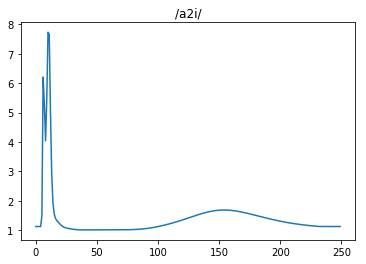

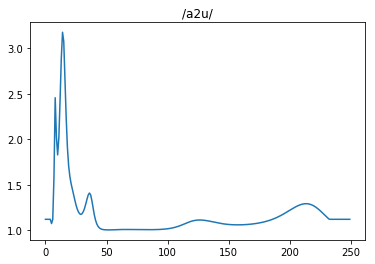

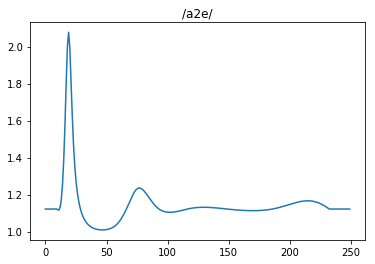

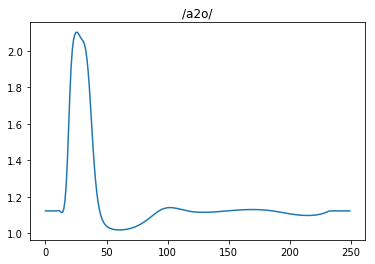

In [3]:
EQ_f_tbl = [100,125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3200,4000,5000]

a2i = [0,23,22,24,24,13,6,-2,-10,-24,-24,-24,-20,-5,7,13,10,0]
a2u = [0,-2,16,15,17,20,14,9,3,9,-20,-23,-22,-21,-3,-5,0,0]
a2e = [0,0,0,0,0,8,16,10,-1,-13,-22,-10,5,0,0,0,0,0]
a2o = [0,0,0,0,0,0,11,16,16,13,-4,-16,-10,0,0,0,0,0]

print(len(a2i),len(a2u),len(a2e),len(a2o))
filter_bank = {}
for fi,f in enumerate(EQ_f_tbl):
    filter_bank[f] = a2i[fi] 
def modify_specEnv(X,curve):
    assert(X.shape[0] ==len(curve))
    _X = cp.copy(X)
    for i in range(_X.shape[1]):
        _X[:,i] *= curve 
    return _X
def get_curve(nfft = 2048,kernel = a2i,fs = 44100):
    freq_X = np.fft.fftfreq(nfft, d=1/fs)[:int(nfft/2)+1]
    curve = scipy.interpolate.spline(EQ_f_tbl,kernel,freq_X)
    return db2amp(curve)
curve = db2amp(get_curve(2048,a2i))
plt.title('/a2i/')
plt.plot(curve[:250])
plt.show()
curve = db2amp(get_curve(2048,a2u))
plt.title('/a2u/')
plt.plot(curve[:250])
plt.show()
curve = db2amp(get_curve(2048,a2e))
plt.title('/a2e/')
plt.plot(curve[:250])
plt.show()
curve = db2amp(get_curve(2048,a2o))
plt.title('/a2o/')
plt.plot(curve[:250])
plt.show()




# Convert /a/ to /i/

In [6]:
x,fs = sf.read('my_a.wav')
frame_period = 10
X = librosa.stft(x,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
print(X.shape)

absX = np.abs(X)
phaX = X/absX

curve = get_curve(2048,a2i)

absX = modify_specEnv(absX,curve)

xx = librosa.istft(absX*phaX,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.8

sf.write('foo.wav', xx, fs)

# my_util.wavPlayer('foo3.wav')

my_util.wavPlayer('foo.wav')
my_util.wavPlayer('my_i.wav')


(1025, 201)


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


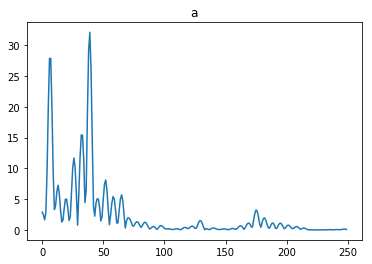

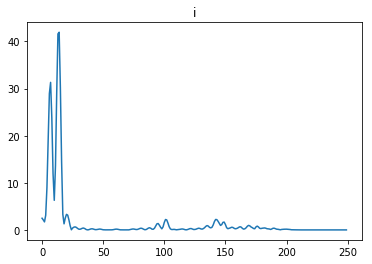

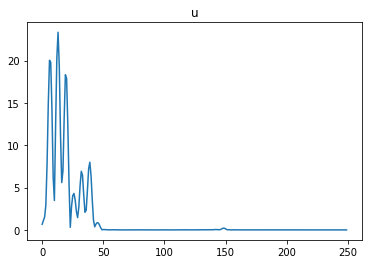

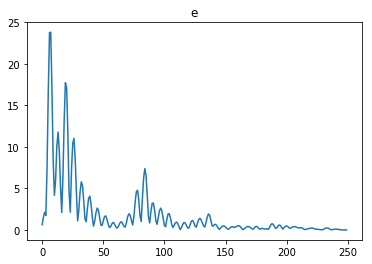

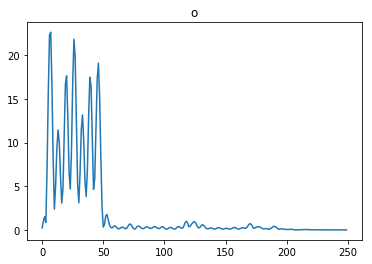

In [20]:
tmp,_ = getAmpPha('my_a.wav')
plt.title('a')
plt.plot(tmp[:250,10])
plt.show()
tmp,_ = getAmpPha('my_i.wav')
plt.title('i')
plt.plot(tmp[:250,10])
plt.show()
tmp,_ = getAmpPha('my_u.wav')
plt.title('u')
plt.plot(tmp[:250,10])
plt.show()
tmp,_ = getAmpPha('my_e.wav')
plt.title('e')
plt.plot(tmp[:250,10])
plt.show()
tmp,_ = getAmpPha('my_o.wav')
plt.title('o')
plt.plot(tmp[:250,10])
plt.show()


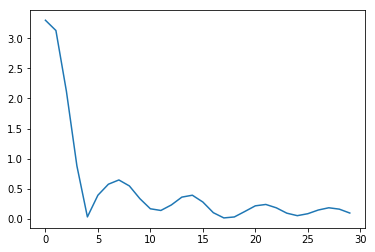

In [16]:
def getAmpPha(src):
    x,fs = sf.read(src)
    X = librosa.stft(x,n_fft=2048,win_length = 1024, hop_length=int(44100/(1000/frame_period)))
    absX = np.abs(X)
    phaX = X/absX
    return absX,phaX


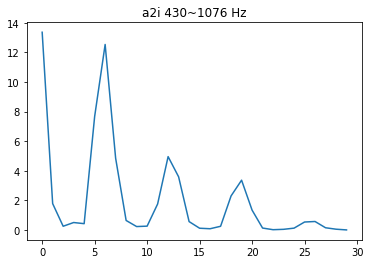

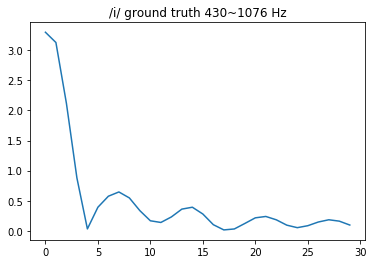

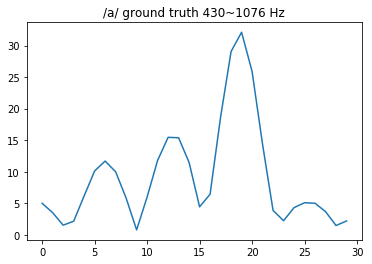

In [21]:
plt.title('a2i 430~1076 Hz')
plt.plot(absX[20:50,10])
plt.show()
amp,_ = getAmpPha('my_i.wav')
plt.title('/i/ ground truth 430~1076 Hz')
plt.plot(amp[20:50,10])
plt.show()

amp,_ = getAmpPha('my_a.wav')
plt.title('/a/ ground truth 430~1076 Hz')
plt.plot(amp[20:50,10])
plt.show()


# Problem with the spectrum of synthesized /i/ 

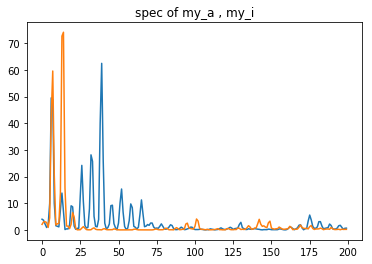

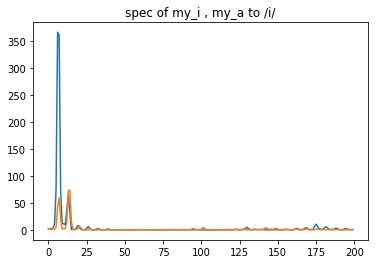

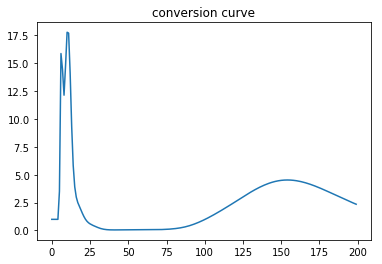

In [50]:
x,fs = sf.read('my_a.wav')
xi,fs = sf.read('my_i.wav')
foo,fs = sf.read('foo.wav')

frame_period = 10
X = librosa.stft(x,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
Xi = librosa.stft(xi,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
Fi = librosa.stft(foo,n_fft=2048, hop_length=int(44100/(1000/frame_period)))

absX = np.abs(X)
absXi = np.abs(Xi)
absFi = np.abs(Fi)

plt.title('spec of my_a , my_i')
plt.plot(absX[:200,10])
plt.plot(absXi[:200,10])
plt.show()

plt.title('spec of my_i , my_a to /i/')
plt.plot(absFi[:200,10])
plt.plot(absXi[:200,10])
plt.show()

plt.title('conversion curve')
plt.plot(curve[:200])
plt.show()

# Inv real task i2a (multiply by 1/(a2i curve) )

17.7705017332621 0.026960248 1.3480124


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


[1.3480124  4.095274   3.3416846  0.6123359  0.20797357 0.2290411
 0.15195781 0.06897783 0.22077958 0.08750154]
[0.02696025 0.08190548 0.06683369 0.01224672 0.00415947 0.00458082
 0.00303916 0.00137956 0.00441559 0.00175003]


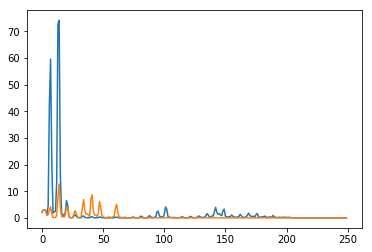

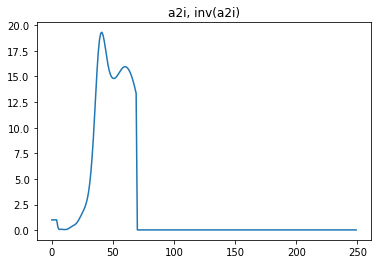

In [98]:
import copy as cp
foo,fs = sf.read('my_i.wav')

frame_period = 10
Fi = librosa.stft(foo,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absFi = np.abs(Fi)
phaFi = Fi/absFi

curve = get_curve(2048,a2i)

curve[70:] =50
out = modify_specEnv(absFi,1/curve)

print(curve[10],out[100,10],absFi[100,10])

xx = librosa.istft(out*phaFi,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.7
sf.write('i2a_fixed.wav', xx, fs)
my_util.wavPlayer('i2a_fixed.wav')
my_util.wavPlayer('my_a.wav')

# my_util.wavPlayer('foo.wav')
print(absFi[100:110,10])
print(out[100:110,10])
plt.plot(absFi[:250,10])
plt.plot(out[:250,10])
plt.show()
plt.title('a2i, inv(a2i)')
plt.plot(1/curve[:250])
plt.show()

# Fine tune i2a

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


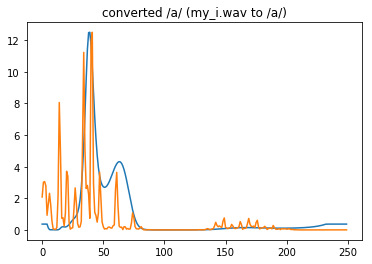

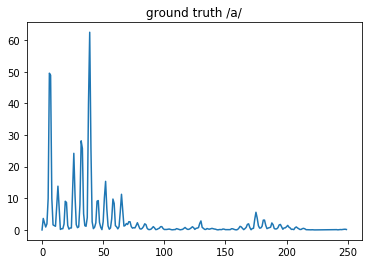

In [29]:
import copy as cp
i2a = [0,-23,-32,-30,-40,-13,-6,2,10,30,20,20,10,-50,-50,-13,-10,0]
foo,fs = sf.read('my_i.wav')

frame_period = 10
Fi = librosa.stft(foo,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absFi = np.abs(Fi)
phaFi = Fi/absFi
curve = get_curve(2048,i2a)

out = modify_specEnv(absFi,curve)

xx = librosa.istft(out*phaFi,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.7
sf.write('i2a_fineTune.wav', xx, fs)
my_util.wavPlayer('i2a_fineTune.wav')
my_util.wavPlayer('my_a.wav')
my_util.wavPlayer('my_i.wav')


plt.title('converted /a/ (my_i.wav to /a/)')
plt.plot(curve[:250]/max(curve[:250])*max(out[:250,10]))
plt.plot(out[:250,10])
plt.show()

plt.title('ground truth /a/')
plt.plot(absX[:250,10])
plt.show()


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


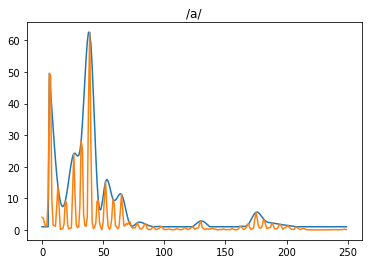

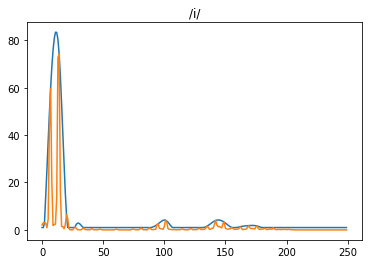

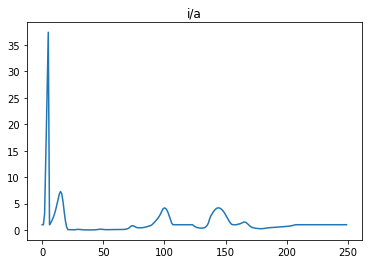

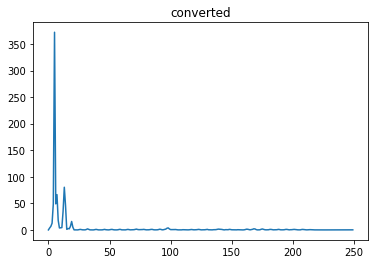

In [57]:
from scipy.signal import find_peaks


xa,fs = sf.read('my_a.wav')
xi,fs = sf.read('my_i.wav')
frame_period = 10
Xa = librosa.stft(xa,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
Xi = librosa.stft(xi,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absXa = abs(Xa)
absXi = abs(Xi)

peaks_a, _ = find_peaks(absXa[:250,10], distance=5)
peaks_i, _ = find_peaks(absXi[:250,10], distance=5)

showN = 250
absX[0,10] = 0

c1 = scipy.interpolate.spline(peaks_a,absXa[peaks_a,10],range(showN))
c2 = scipy.interpolate.spline(peaks_i,absXi[peaks_i,10],range(showN))
c1 = np.maximum(c1,1)
c2 = np.maximum(c2,1)

plt.title('/a/')
plt.plot(c1)
plt.plot(absXa[:showN,10])

plt.show()
plt.title('/i/')
plt.plot(c2)
plt.plot(absXi[:showN,10])
plt.show()

plt.title('i/a')
plt.plot(c2/c1)
plt.show()

curve_ = c2/c1

out = absX[:showN,10]*curve_

plt.title('converted')
plt.plot(out)
plt.show()


# my /a/ power spectrum + my /i/ envelope

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


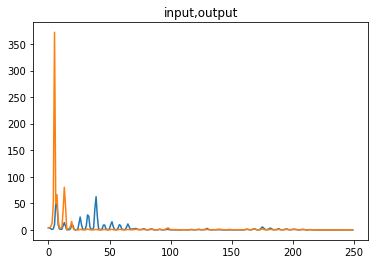

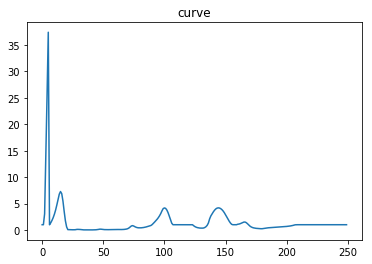

In [63]:
foo,fs = sf.read('my_a.wav')

frame_period = 10
Fi = librosa.stft(foo,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absFi = np.abs(Fi)
phaFi = Fi/absFi

curve = get_curve(2048,a2i)

curve[:250] = curve_
out = modify_specEnv(absFi,curve)


xx = librosa.istft(out*phaFi,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.6
sf.write('test.wav', xx, fs)
my_util.wavPlayer('test.wav')
my_util.wavPlayer('my_i.wav')

plt.title('input,output')
plt.plot(absFi[:250,10])
plt.plot(out[:250,10])
plt.show()

plt.title('curve')
plt.plot(curve[:250])
plt.show()

# my /i/ power spectrum * 1/a2i

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


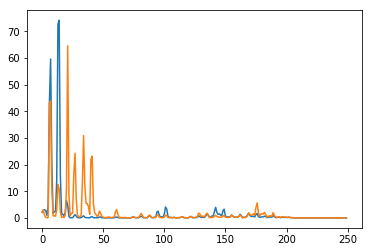

In [64]:

foo,fs = sf.read('my_i.wav')

frame_period = 10
Fi = librosa.stft(foo,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absFi = np.abs(Fi)
phaFi = Fi/absFi

curve = get_curve(2048,a2i)

curve[:250] = 1/curve_
out = modify_specEnv(absFi,curve)


xx = librosa.istft(out*phaFi,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.8
sf.write('test2.wav', xx, fs)
my_util.wavPlayer('test2.wav'),
my_util.wavPlayer('my_a.wav')

plt.plot(absFi[:250,10])
plt.plot(out[:250,10])
plt.show()


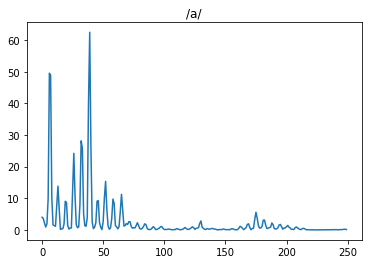

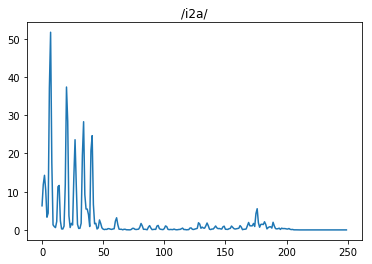

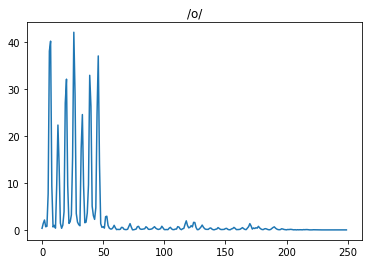

In [42]:
def pSpec(x,t = 'spec',which = 10):
    X = librosa.stft(x,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
    absX = np.abs(X)
    plt.title(t)
    plt.plot(absX[:250,which])
    plt.show()
tmp,fs = sf.read('my_a.wav')
pSpec(tmp,'/a/')    
tmp,fs = sf.read('test2.wav')
pSpec(tmp,'/i2a/')    
tmp,fs = sf.read('my_o.wav')
pSpec(tmp,'/o/')    




# Using different Timbre

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  from ipykernel import kernelapp as app
C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


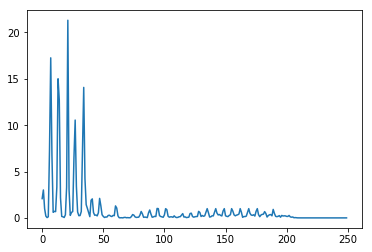

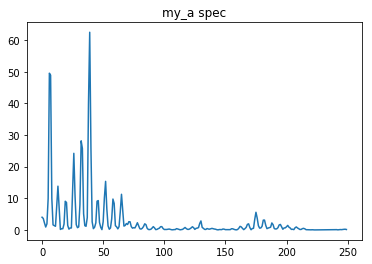

In [28]:
frame_period = 10
###################################
foo,fs = sf.read('my_i.wav')
Fi = librosa.stft(foo,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absFi = np.abs(Fi)
phaFi = Fi/absFi
###################################
a01,fs = sf.read('a_01.wav')
A01 = librosa.stft(a01,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absA01 = np.abs(A01)
###################################
peaks_i, _ = find_peaks(absFi[:250,10], distance=5)
peaks, _ = find_peaks(absA01[:250,10], distance=5)
c1 = scipy.interpolate.spline(peaks,absA01[peaks,10],range(showN))
c2 = scipy.interpolate.spline(peaks_i,absFi[peaks_i,10],range(showN))
c1 = np.maximum(c1,1)
c2 = np.maximum(c2,1)
curve_ = c1/c2

###################################
curve = get_curve(2048,a2i)
curve[:250] = curve_
out = modify_specEnv(absFi,curve)


xx = librosa.istft(out*phaFi,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.8
sf.write('my_i_to_a01.wav', xx, fs)
my_util.wavPlayer('a_01.wav')
my_util.wavPlayer('my_i_to_a01.wav')
my_util.wavPlayer('my_a.wav')

# plt.plot(absFi[:250,10])
plt.plot(out[:250,10])
plt.show()

tmp,fs = sf.read('my_a.wav')
myA = librosa.stft(tmp,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absmyA = np.abs(myA)
plt.title('my_a spec')
plt.plot(absmyA[:250,10])
plt.show()


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


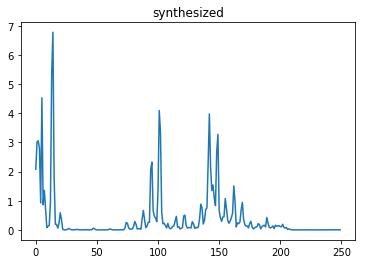

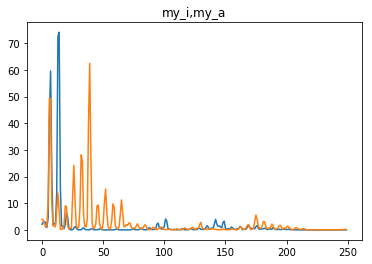

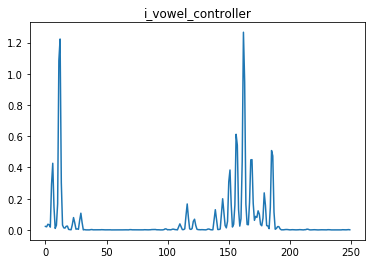

In [95]:

frame_period = 10
use_pre = True
###################################
foo,fs = sf.read('my_a.wav')
# if use_pre:
#     foo  = audio.preemphasis(foo)

Fa = librosa.stft(foo,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absFa = np.abs(Fa)
phaFa = Fa/absFa
###################################
i01,fs = sf.read('i_01.wav')
if use_pre:
    i01  = audio.preemphasis(i01)
I01 = librosa.stft(i01,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absI01 = np.abs(I01)
###################################
peaks, _ = find_peaks(absI01[:250,10], distance=5)
peaks_a, _ = find_peaks(absFa[:250,10], distance=5)
c1 = scipy.interpolate.spline(peaks,absI01[peaks,10],range(showN))
c2 = scipy.interpolate.spline(peaks_a,absFa[peaks_a,10],range(showN))
c1 = np.maximum(c1,1)
c2 = np.maximum(c2,1)
curve_ = c1/c2

###################################
curve = get_curve(2048,a2i)
curve[:250] = curve_
out = modify_specEnv(absFi,curve)


xx = librosa.istft(out*phaFa,hop_length=int(44100/(1000/frame_period)))
if use_pre:
    xx  = audio.inv_preemphasis(xx)
xx = xx/max(xx)*0.8


sf.write('my_a_to_i01.wav', xx, fs)
my_util.wavPlayer('i_01.wav')
my_util.wavPlayer('my_a_to_i01.wav')
my_util.wavPlayer('my_i.wav')

plt.title('synthesized')
plt.plot(out[:250,10])
plt.show()

plt.title('my_i,my_a')
plt.plot(absFi[:250,10])
plt.plot(absFa[:250,10])

plt.show()

plt.title('i_vowel_controller')
plt.plot(absI01[:250,10])
plt.show()



(201, 80)


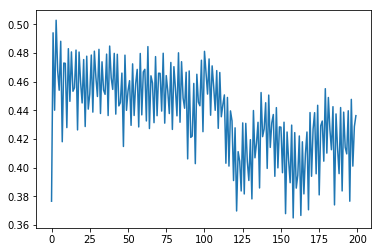

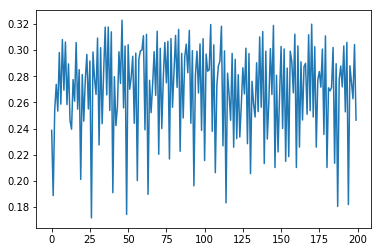

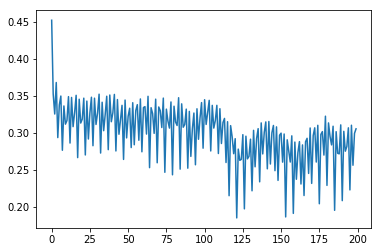

In [39]:
mel= audio.melspectrogram(x).astype(np.float32).T
mel_i= audio.melspectrogram(xi).astype(np.float32).T

print(mel.shape)
plt.plot(mel[:200,10])
plt.show()
plt.plot(mel_i[:200,10])
plt.show()
foo,fs = sf.read('foo.wav')
foo_i= audio.melspectrogram(foo).astype(np.float32).T
plt.plot(foo_i[:200,10])
plt.show()

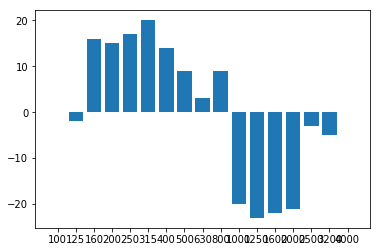

In [55]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = a2u

bars = EQ_f_tbl

y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()
 

In [23]:
def toDB(x):
    return 20*np.log10(x)
toDB(0.15)

-16.478174818886377

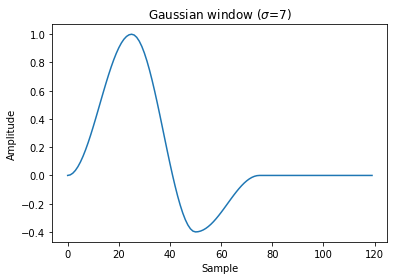

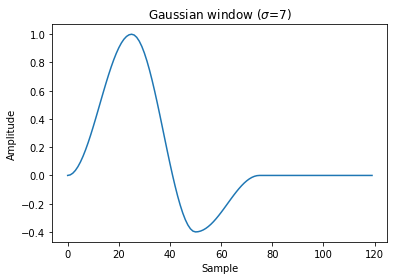

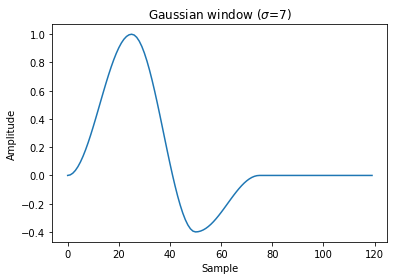

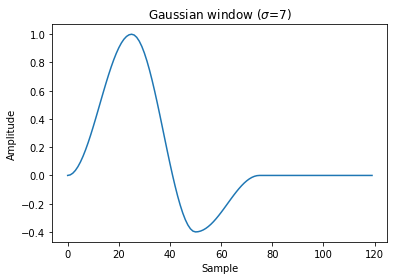

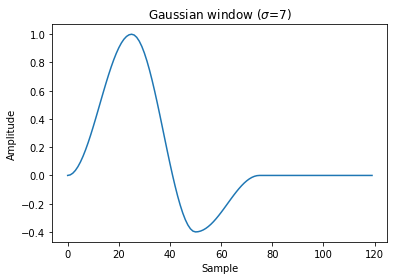

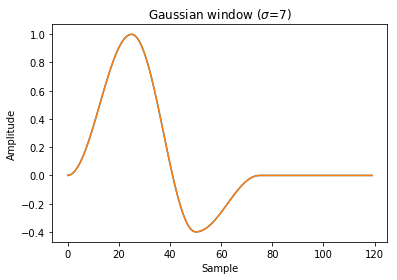

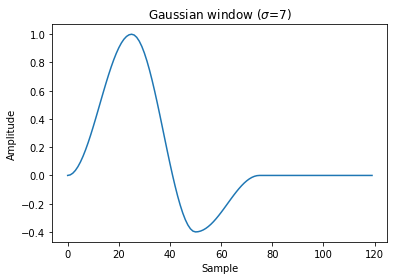

<Figure size 432x288 with 0 Axes>

In [19]:
from scipy import signal
from scipy.fftpack import fft, fftshift

# window = signal.gaussian(51, std=7)
window = np.hanning(51)
x = np.zeros((120,))
x[25-25:25+25+1] = window
x[50-25:50+25+1] -= window*0.4

plt.plot(x)


plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
plt.show()


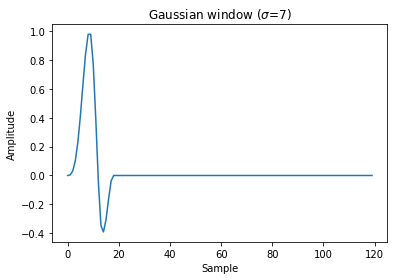

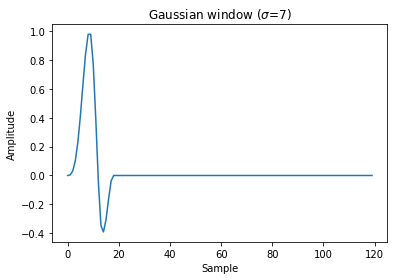

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(xlog)
plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
plt.show()